In [56]:
import bprobit as pr

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import os
import pickle as pkl
import collections as coll
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.graphics import tsaplots
from imp import reload
#from pdb import set_trace

plt.style.use('seaborn-whitegrid')

reload(pr)

<module 'bprobit' from '/work/Alex_stuff/bprobit.py'>

In [24]:
#from sklearn.datasets import load_breast_cancer

#data = load_breast_cancer()

#X = data.data
#y = data.target

In [81]:
infile = open('work.pkl','rb')          # canada

df = pkl.load(infile)                               # load
print(df.shape)

N, D = df.shape[0], df.shape[1]

X = df[df.columns.difference(['labels'])].to_numpy()
#X = np.insert(X, 0, values = 1, axis=1)       # insert constant
print(X.shape)

y = df['labels'].to_numpy()
y.shape

#coll.Counter(y)
print(sum(y == 1)/N)

(13661, 90)
(13661, 89)
0.10841080447990631


Simulate data:

In [92]:
N = 5000       # sample size
D = 10         # number of features

bp = pr.BayesProbit()

y, X, true_theta = bp.simulate_DGP(N, D, set_seed = 42)   # probit model

coll.Counter(y)

Counter({0: 3736, 1: 1264})

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(4000, 11)
(1000, 11)


In [94]:
# For comparison:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

yhat_train = clf.predict(X_train)
yhat_test = clf.predict(X_test)
clf.score(X_test, y_test)

0.835

In [95]:
reload(pr)

# Mean field variational inference
bp = pr.BayesProbit_VI(alpha_0=1e-1, beta_0=1e-1, max_iter=500, verbose=True)

In [98]:
# Gibbs sampling
burn_in = 2000
bp = pr.BayesProbit_MCMC(N_sim = 5000, burn_in = burn_in, pred_mode = ['plug_in'], verbose=True)

In [99]:
model = bp.fit(X_train, y_train)

Iter.1000
Iter.2000
Iter.3000
Iter.4000
Discarding first 2000 draws.


## Check lower bound of marginal likelihood for convergence:

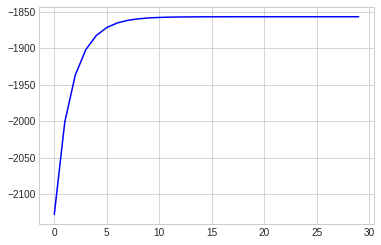

In [47]:
lower = model['LowerB'][model['LowerB'] != 0.]
x_grid = np.arange(len(lower))     # iterations
trim = 60                           # skip burn-in phase
trim = min(trim,len(lower)-1)
plt.clf()
plt.plot(x_grid[:trim], lower[:trim], '-b')
plt.show() 

## Check Markov chains for convergence:

Feature 0


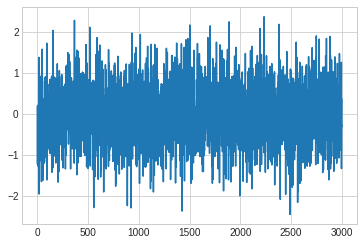

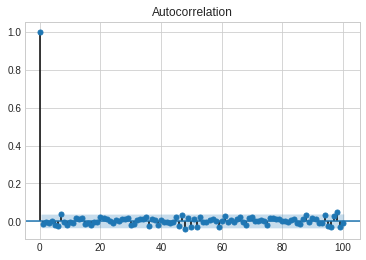

Feature 1


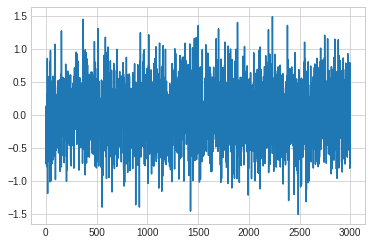

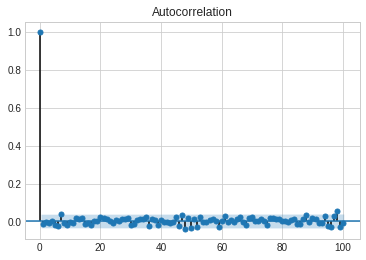

Feature 2


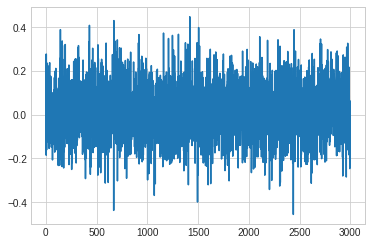

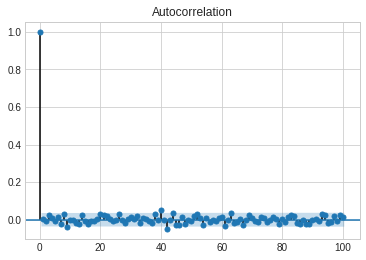

Feature 3


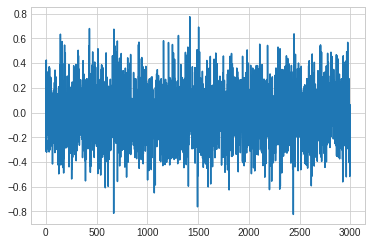

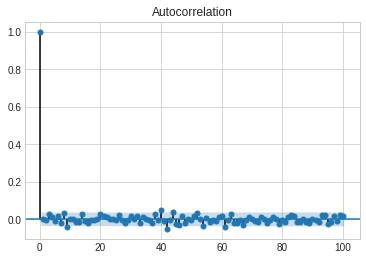

Feature 4


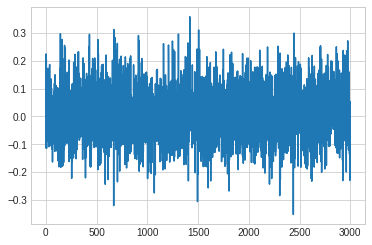

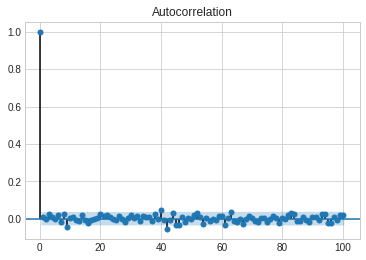

Feature 5


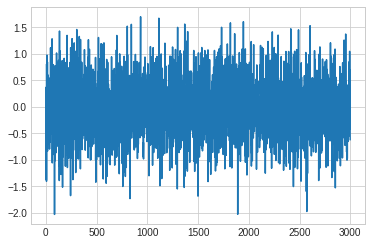

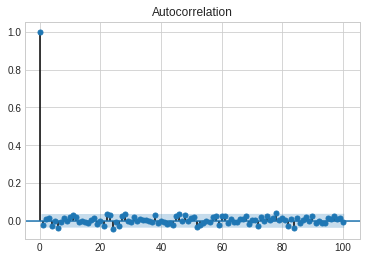

Feature 6


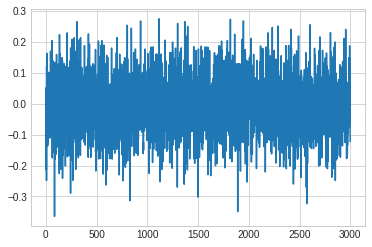

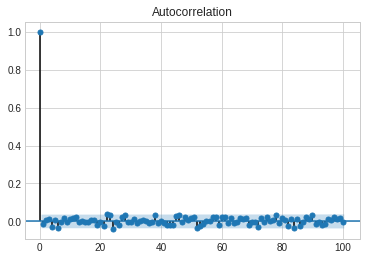

Feature 7


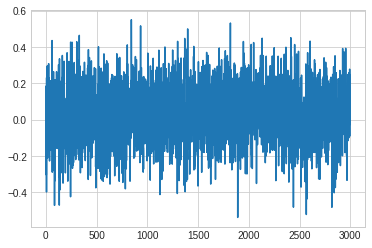

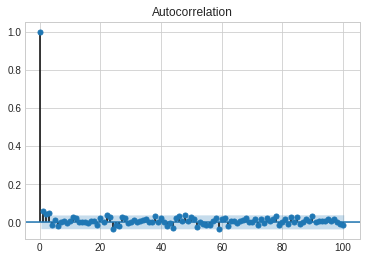

Feature 8


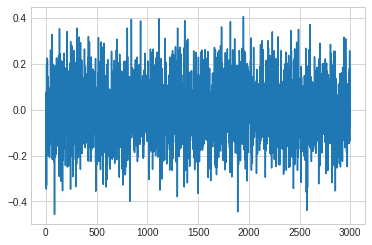

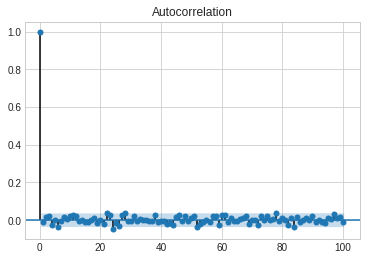

Feature 9


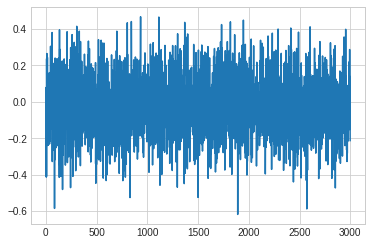

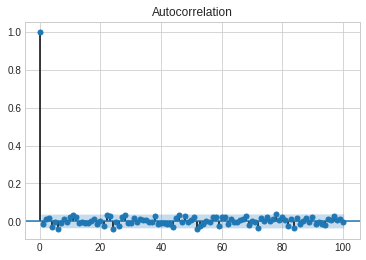

Feature 10


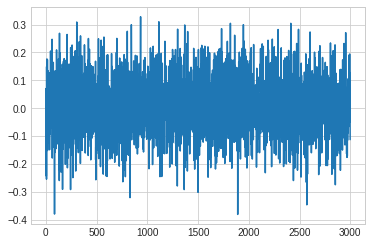

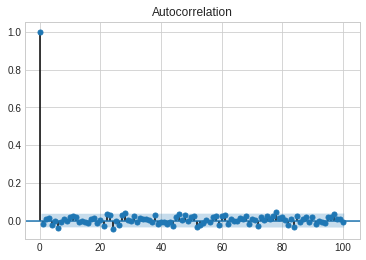

Feature 11


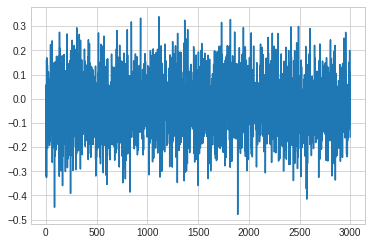

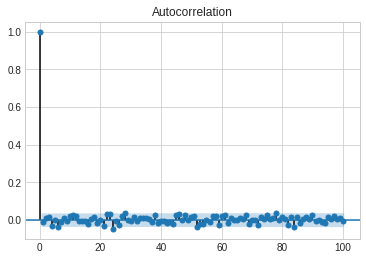

Feature 12


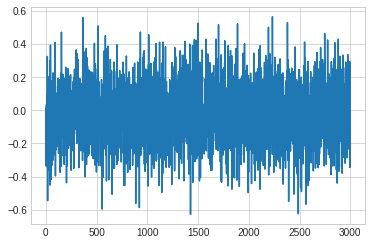

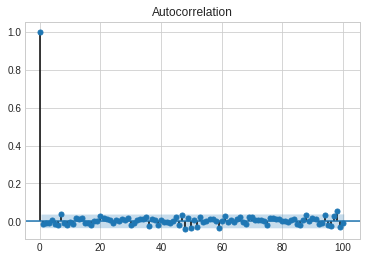

Feature 13


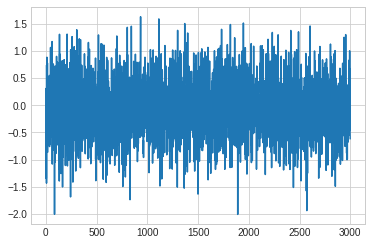

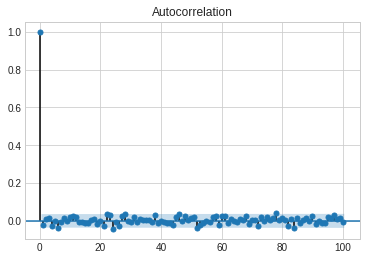

Feature 14


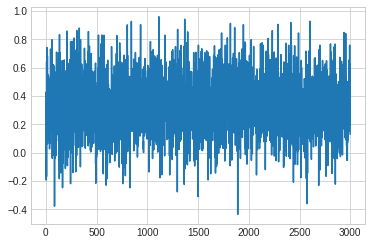

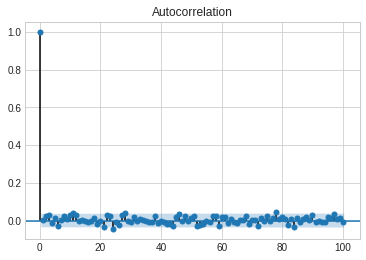

Feature 15


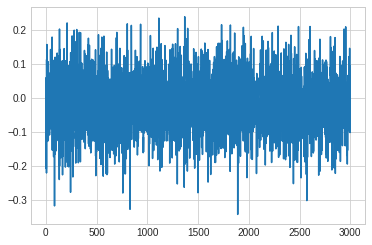

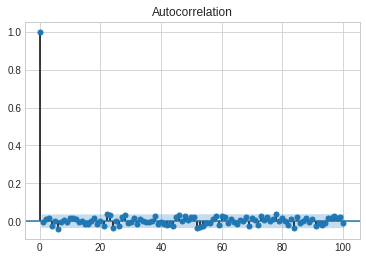

Feature 16


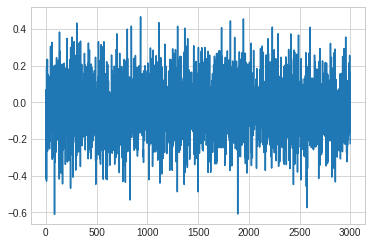

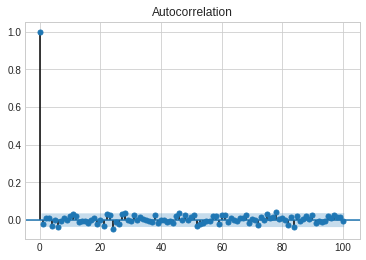

Feature 17


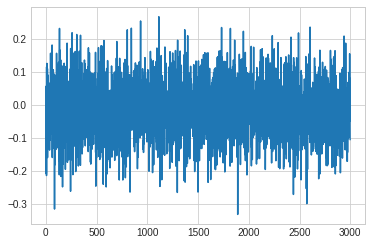

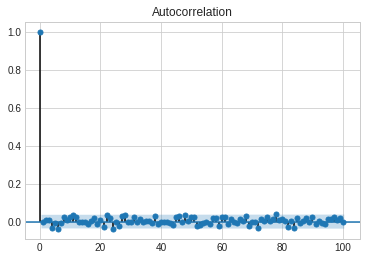

Feature 18


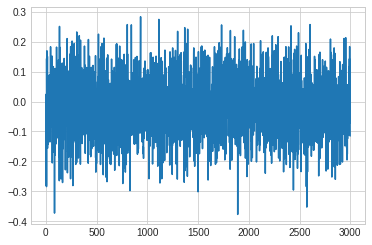

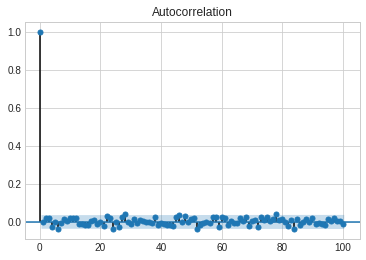

Feature 19


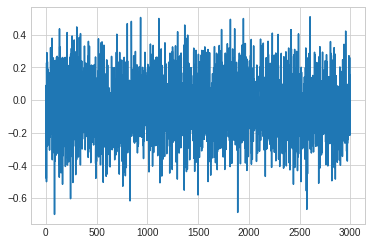

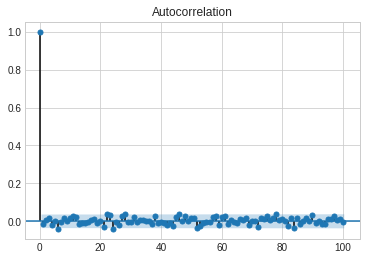

Feature 20


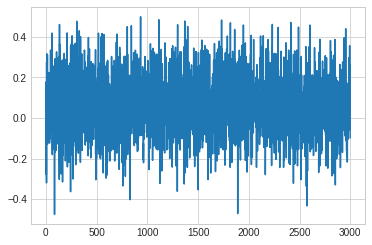

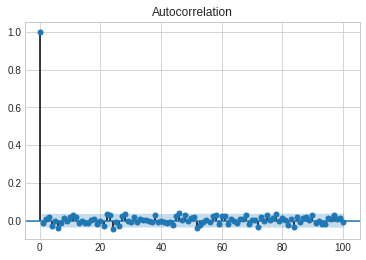

Feature 21


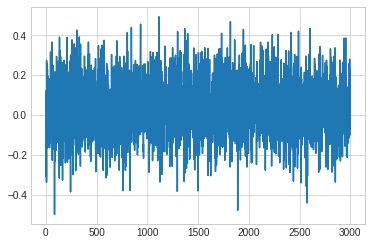

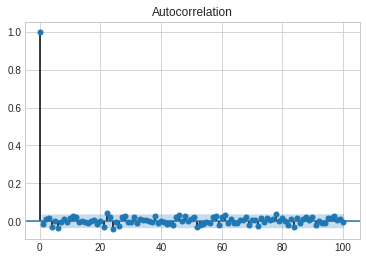

Feature 22


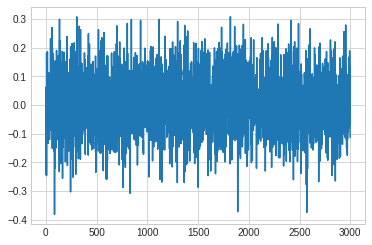

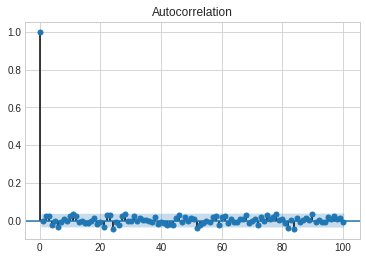

Feature 23


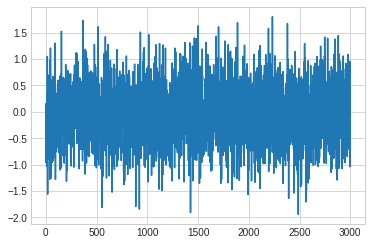

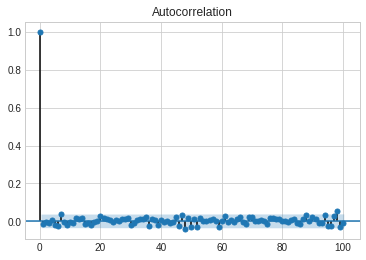

Feature 24


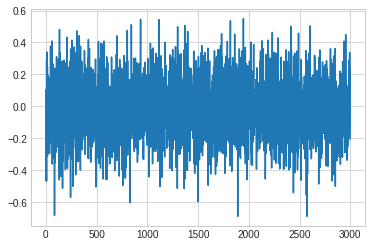

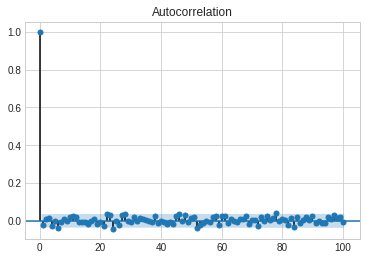

Feature 25


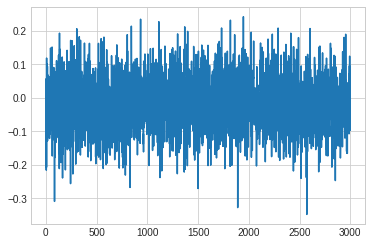

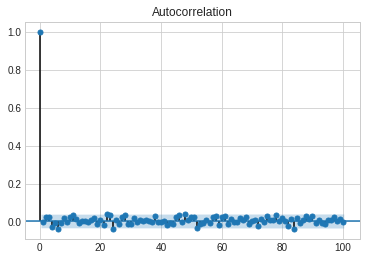

Feature 26


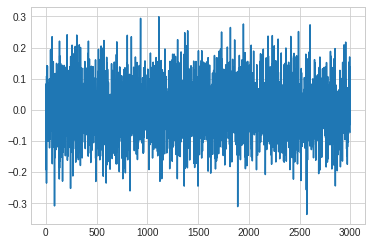

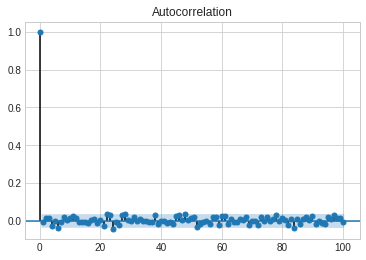

Feature 27


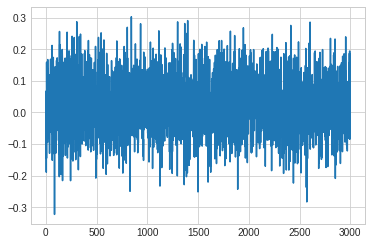

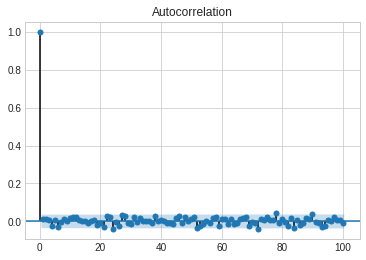

Feature 28


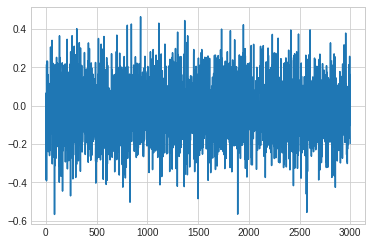

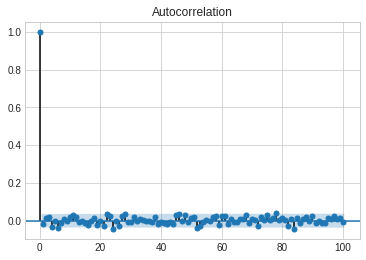

Feature 29


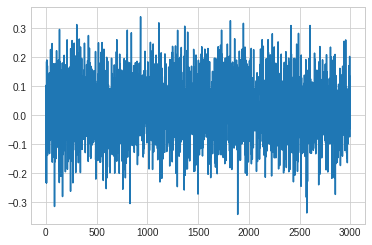

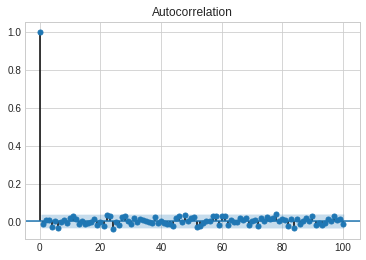

Feature 30


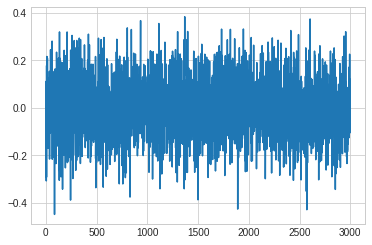

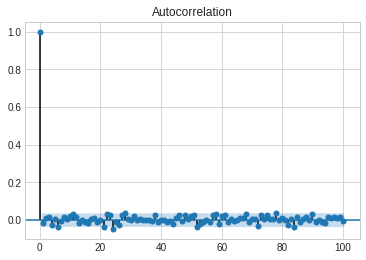

Feature 31


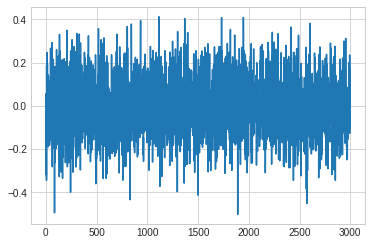

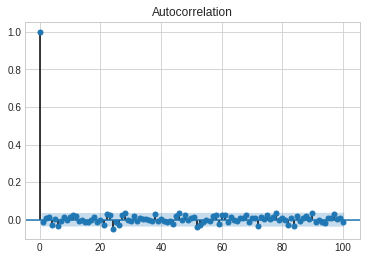

Feature 32


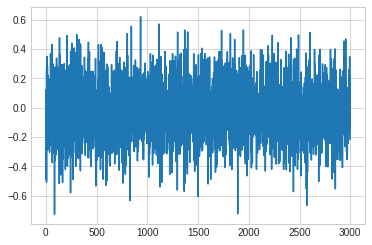

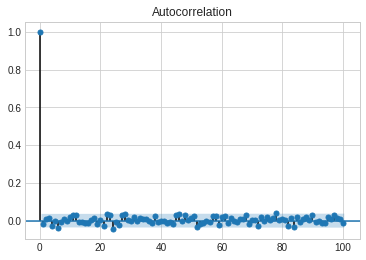

Feature 33


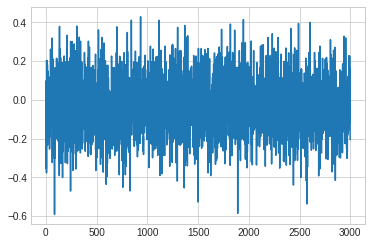

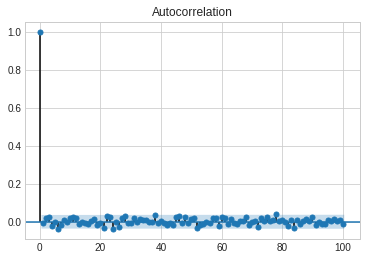

Feature 34


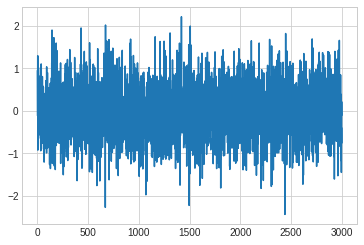

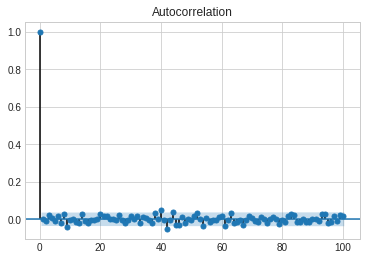

Feature 35


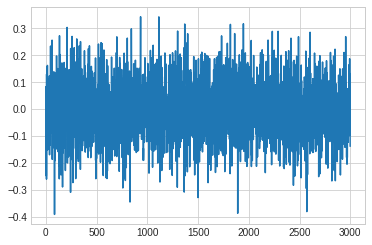

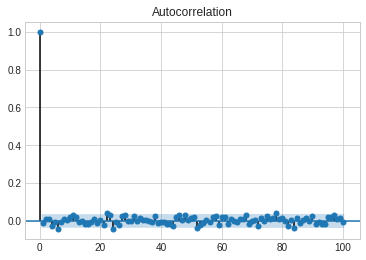

Feature 36


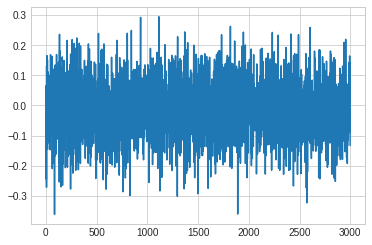

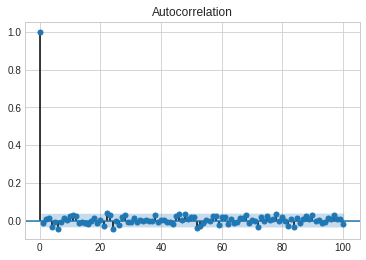

Feature 37


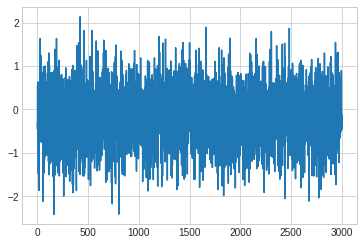

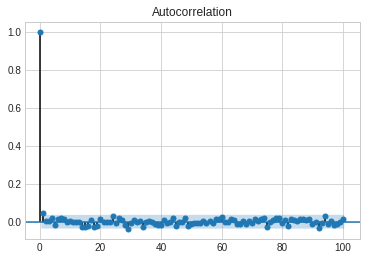

Feature 38


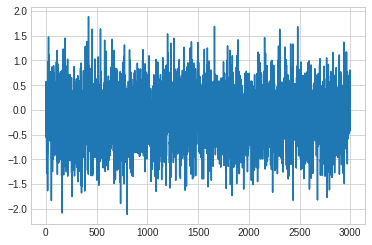

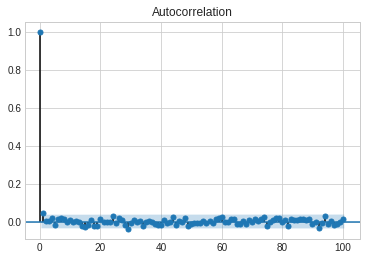

Feature 39


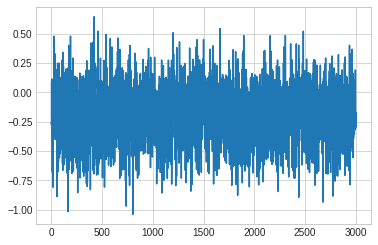

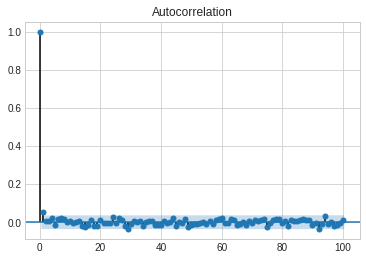

Feature 40


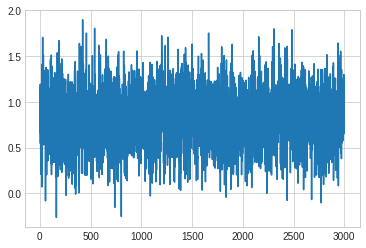

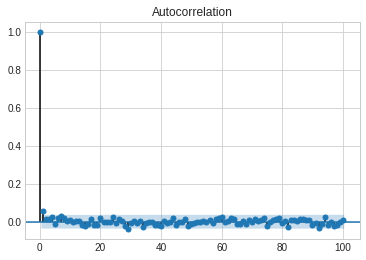

Feature 41


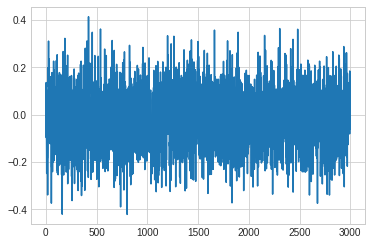

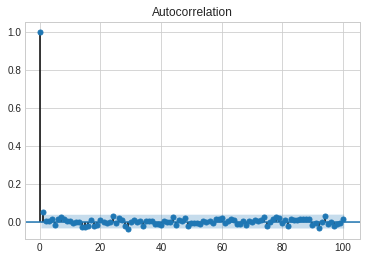

Feature 42


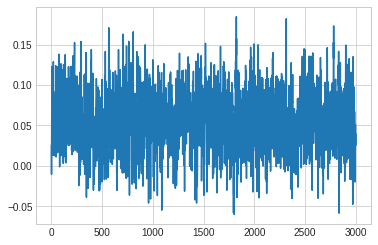

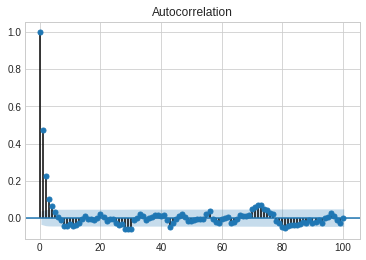

Feature 43


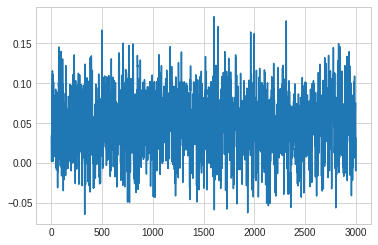

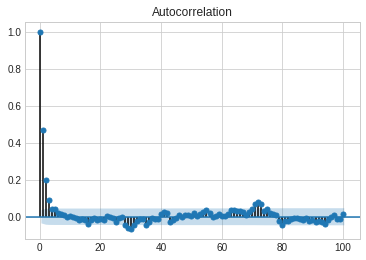

Feature 44


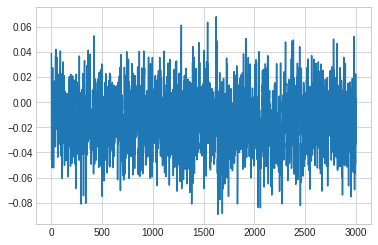

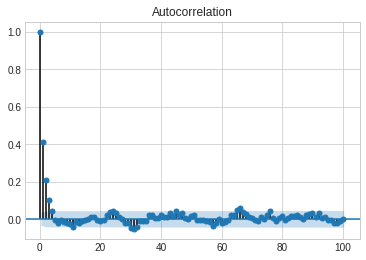

Feature 45


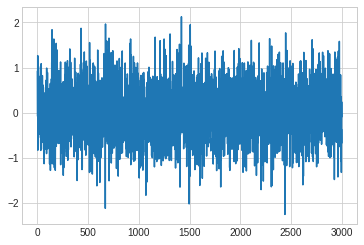

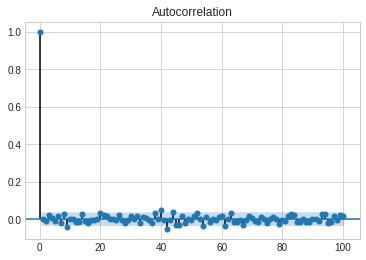

Feature 46


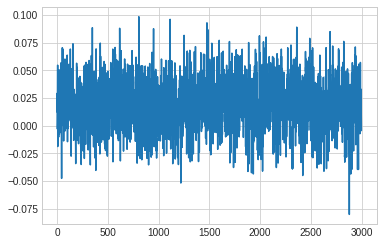

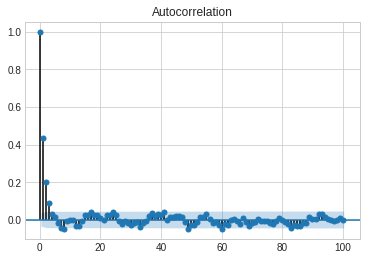

Feature 47


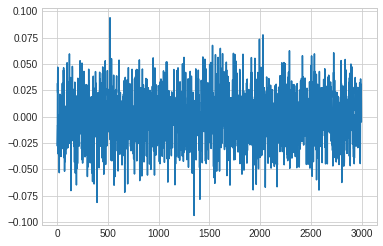

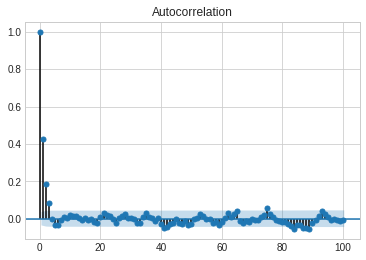

Feature 48


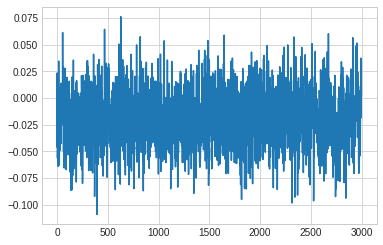

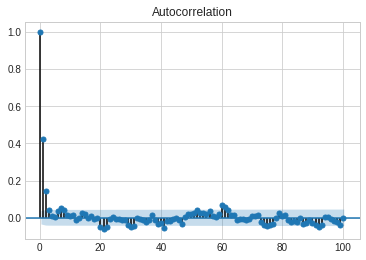

Feature 49


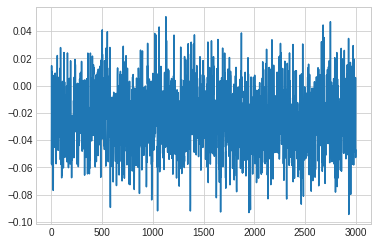

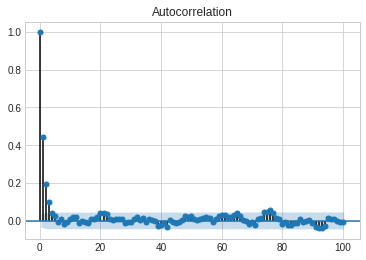

Feature 50


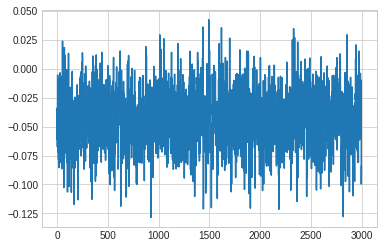

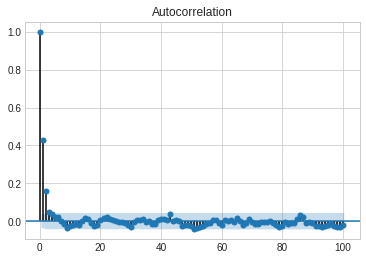

Feature 51


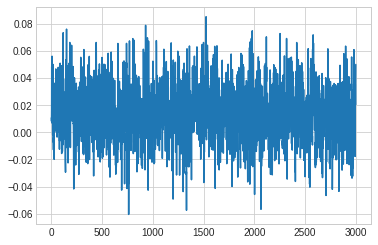

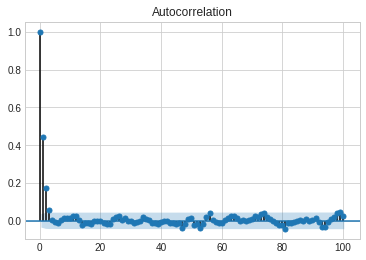

Feature 52


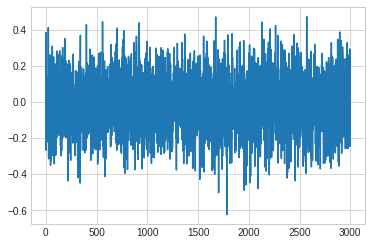

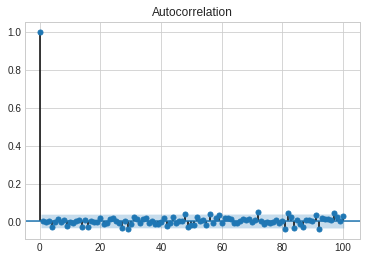

Feature 53


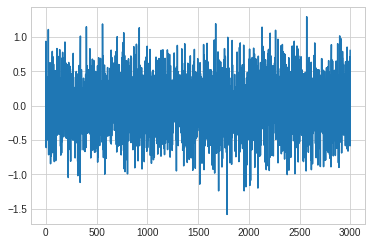

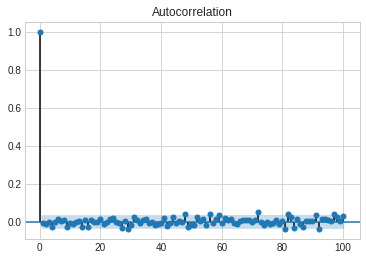

Feature 54


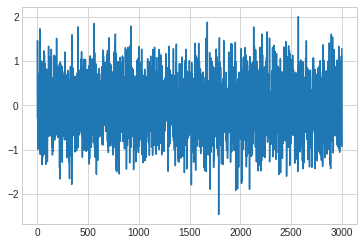

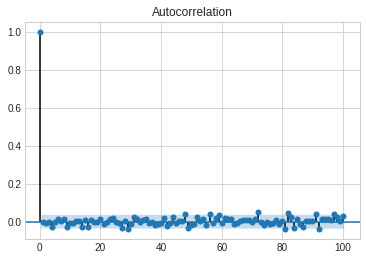

Feature 55


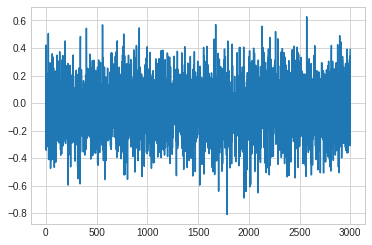

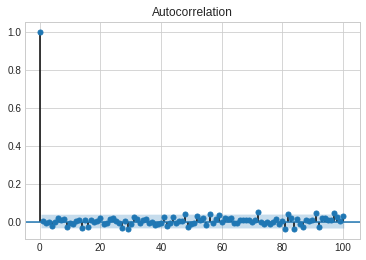

Feature 56


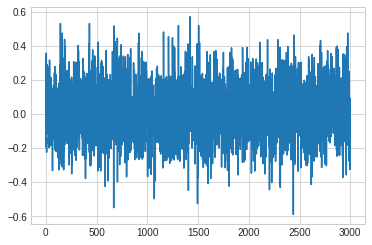

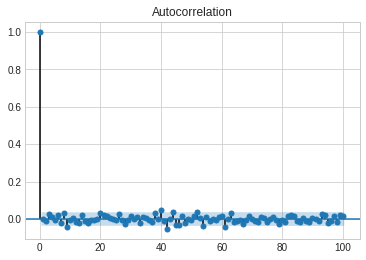

Feature 57


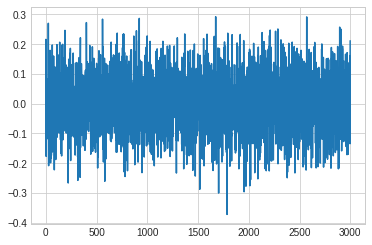

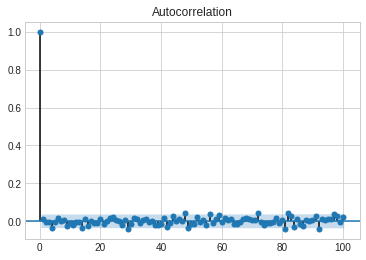

Feature 58


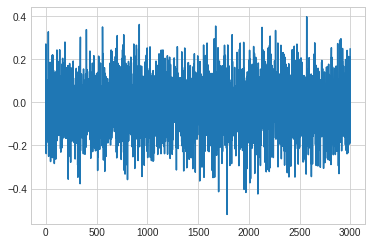

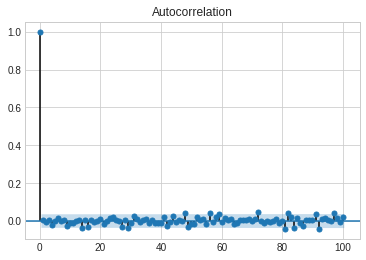

Feature 59


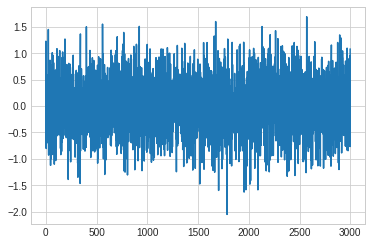

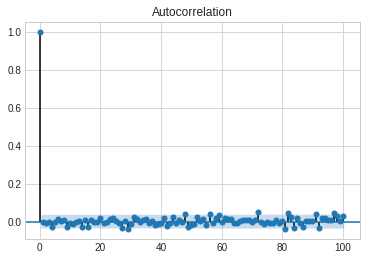

Feature 60


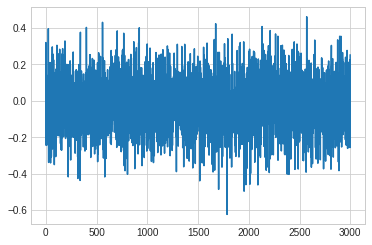

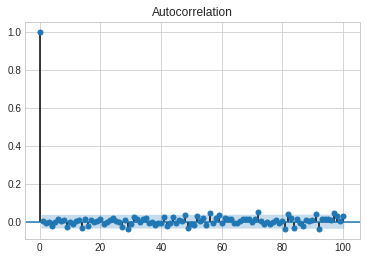

Feature 61


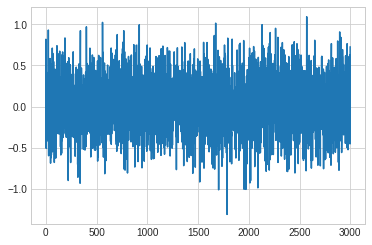

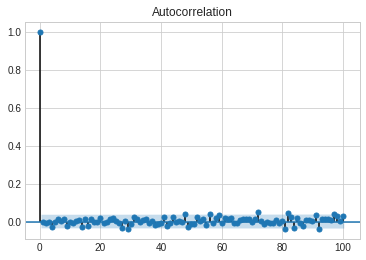

Feature 62


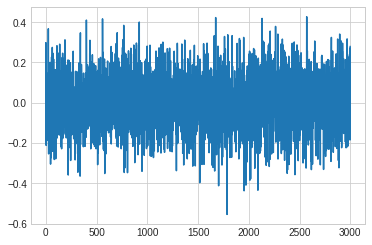

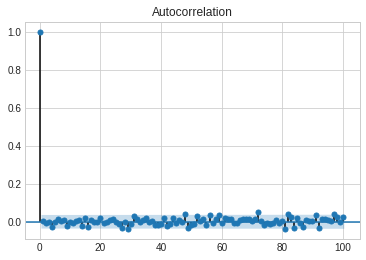

Feature 63


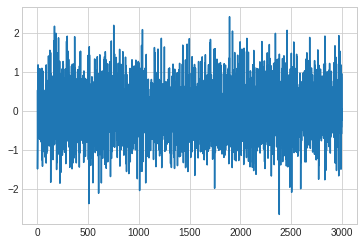

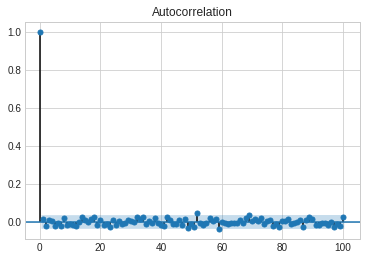

Feature 64


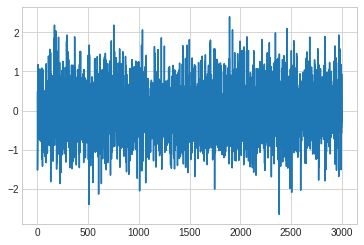

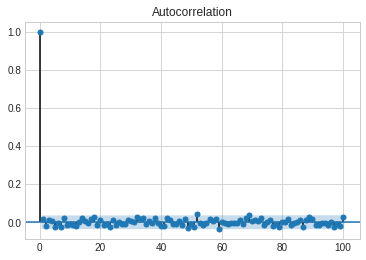

Feature 65


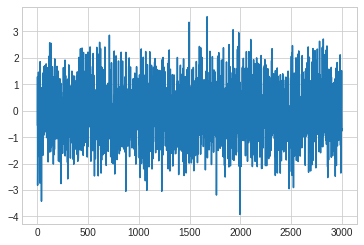

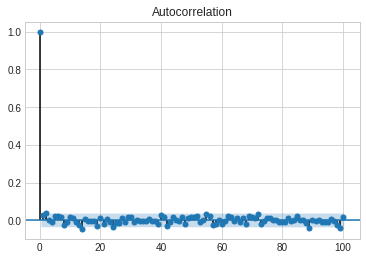

Feature 66


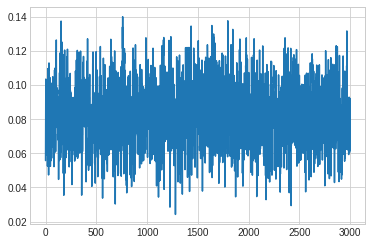

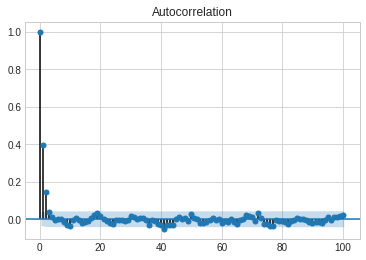

Feature 67


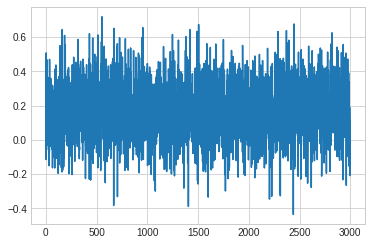

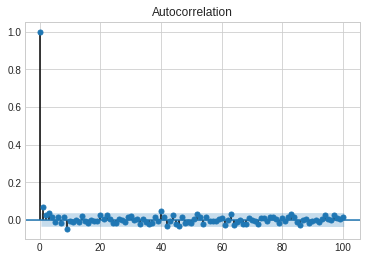

Feature 68


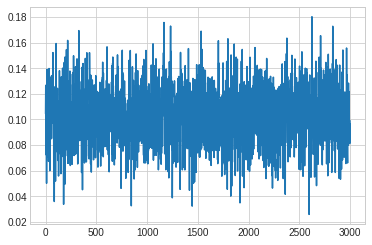

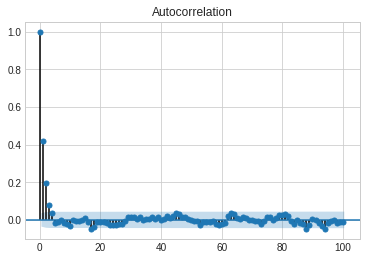

Feature 69


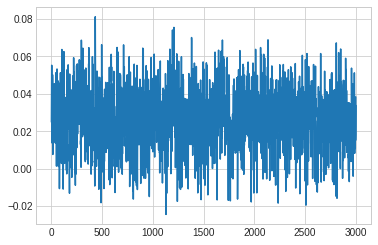

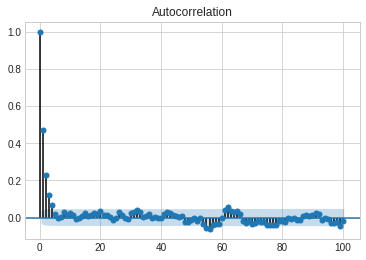

Feature 70


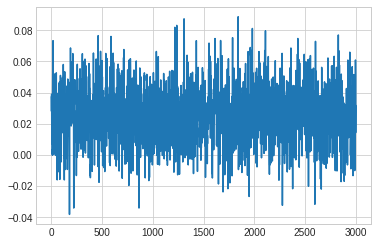

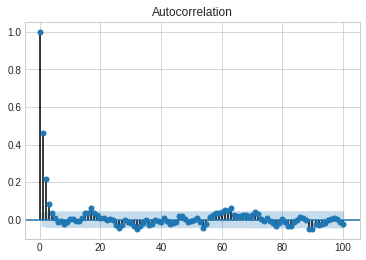

Feature 71


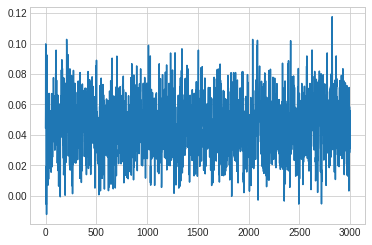

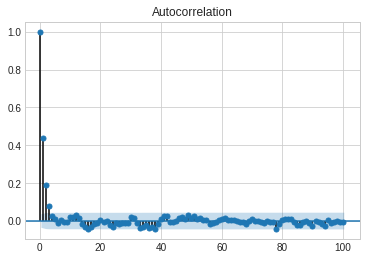

Feature 72


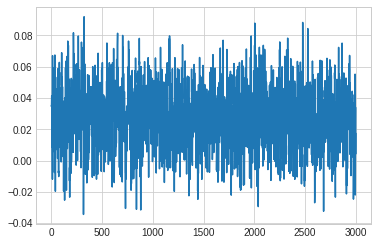

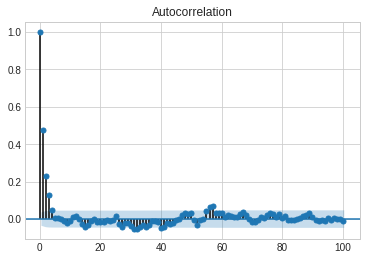

Feature 73


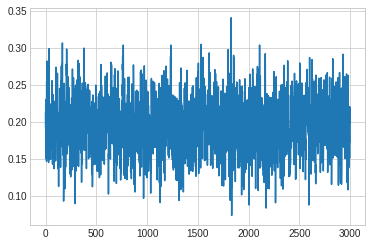

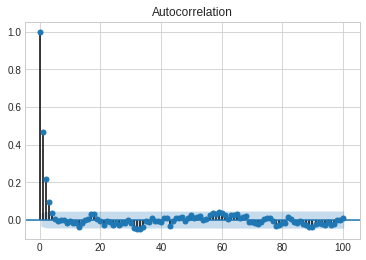

Feature 74


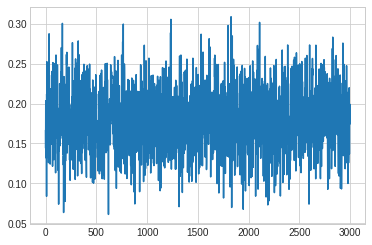

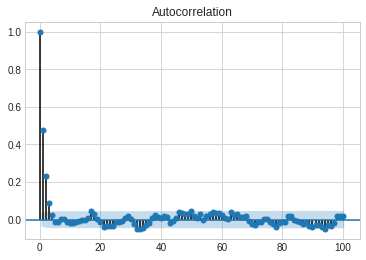

Feature 75


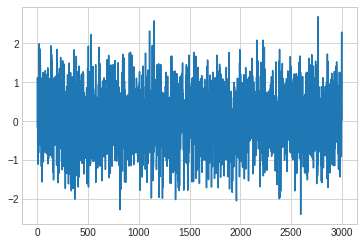

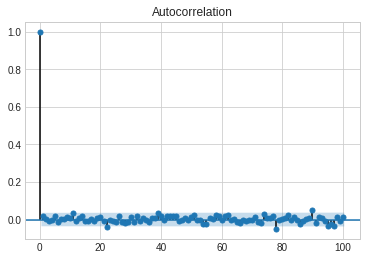

Feature 76


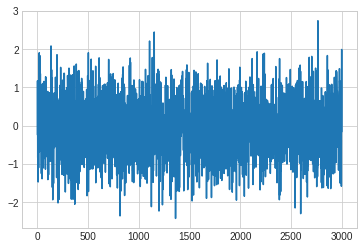

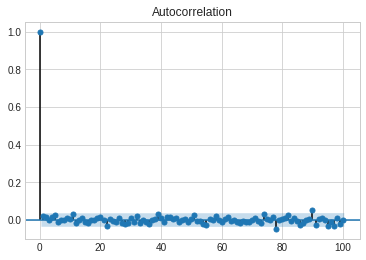

Feature 77


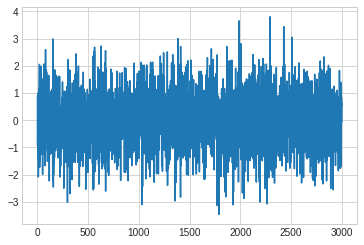

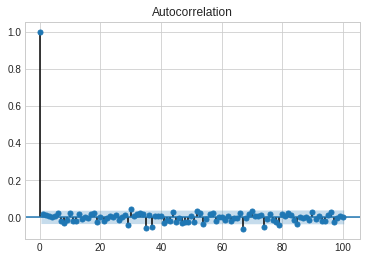

Feature 78


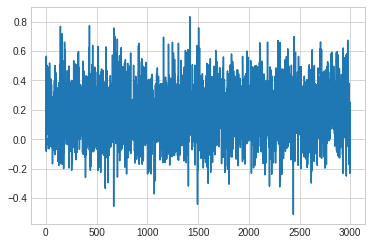

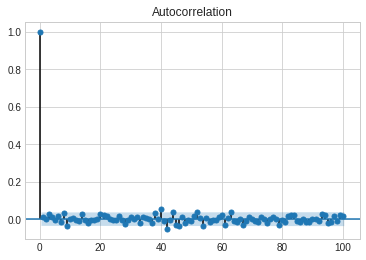

Feature 79


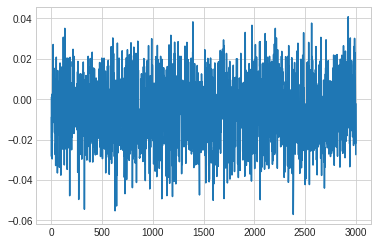

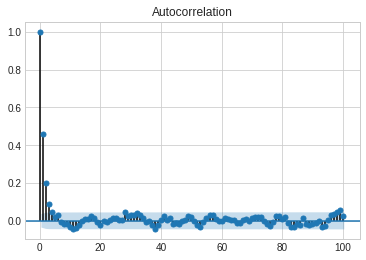

Feature 80


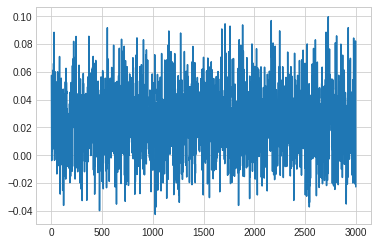

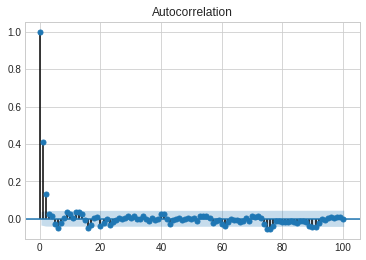

Feature 81


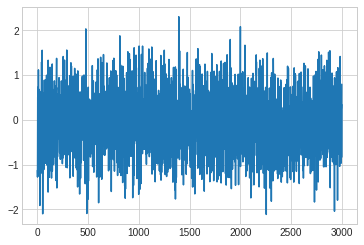

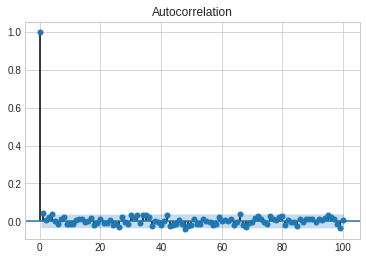

Feature 82


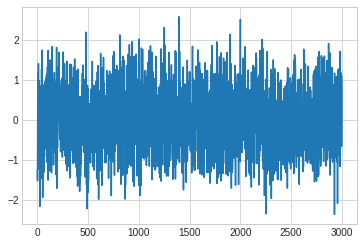

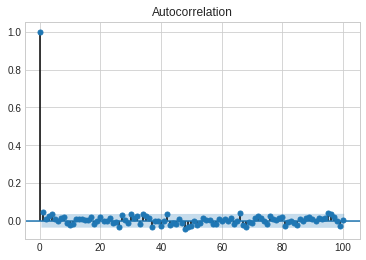

Feature 83


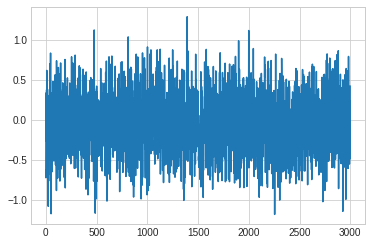

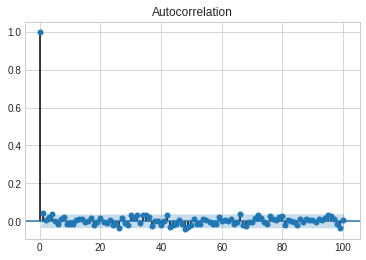

Feature 84


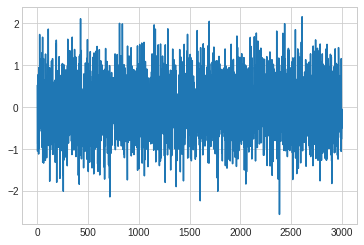

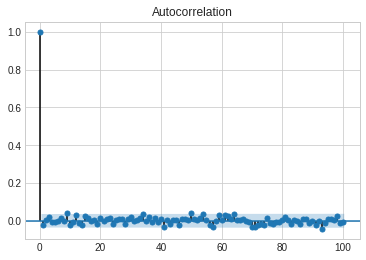

Feature 85


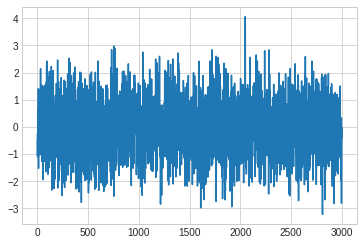

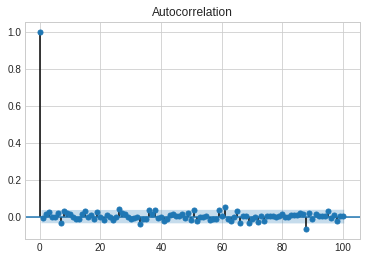

Feature 86


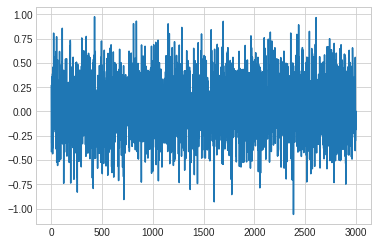

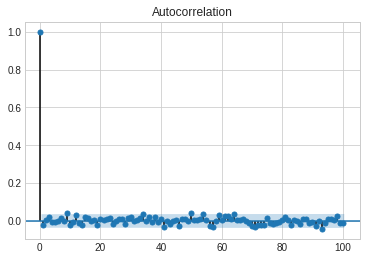

Feature 87


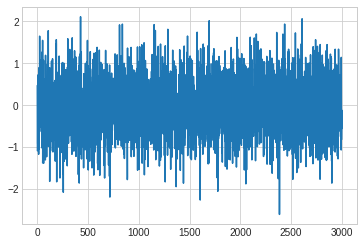

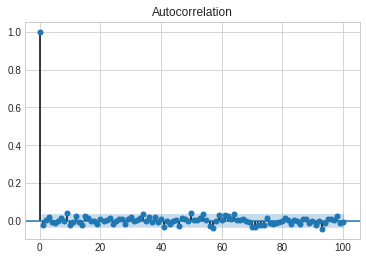

Feature 88


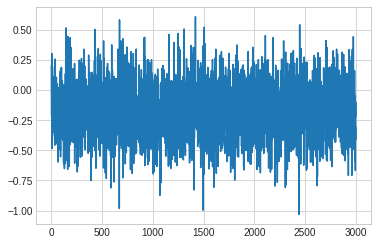

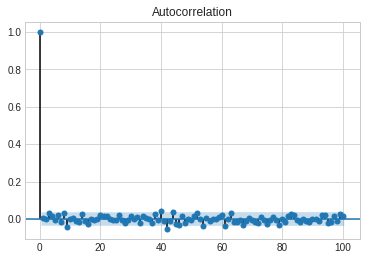

In [17]:
for col in range(bp.theta_chain[burn_in:,:].shape[1]):
    print("Feature {}".format(col))
    plt.plot(bp.theta_chain[burn_in:,col])
    fig = tsaplots.plot_acf(bp.theta_chain[burn_in:,col], lags=100)
    plt.show()

In [100]:
#bp.score(X_train, y_train)
bp.score(X_test, y_test)

Using predictive mode: plug_in


0.791

In [90]:
pprob = bp.predict_proba(X_test)

Using predictive mode: plug_in


In [91]:
uncert = bp.entropy(p0 = 1-pprob, p1 = pprob)

out = pd.DataFrame({'Phi' : pprob, 'Variance': pprob*(1-pprob),'Entropy' : uncert})
out.head()

,Phi,Variance,Entropy
0,0.369278,0.232912,0.950116
1,0.476596,0.249452,0.998419
2,0.361392,0.230788,0.943833
3,0.373789,0.234071,0.953537
4,0.370779,0.233302,0.951269


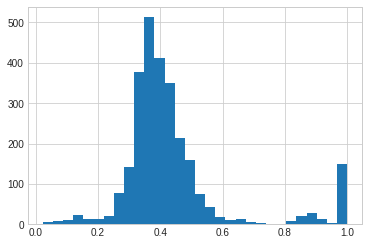

In [21]:
out['Phi'].hist(bins=30)

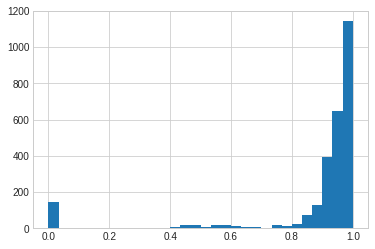

In [22]:
out['Entropy'].hist(bins=30)

### Batch BALD

Implement equations (8), (9) and (12), using (13) from paper

In [ ]:
for col in range(bp.theta_chain[burn_in:,:].shape[1]):
    print("Feature {}".format(col))
    plt.plot(bp.theta_chain[burn_in:,col])

In [15]:
omega = bp.theta_chain[burn_in:,:]
b = 1     # aquisition size
c = 2     # number of classes
k = omega.shape[0]    # number of MC samples
print(k)

3000


In [16]:
Pn = np.zeros((c,k))

In [17]:
omega.shape

(3000, 6)

In [21]:
from sklearn.metrics import roc_curve
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot


In [22]:
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

# For comparison:
#from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

yhat_train = clf.predict(X_train)
yhat_test = clf.predict(X_test)
clf.score(X_test, y_test)

# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = lr_probs[:, 1]

In [25]:

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.408258, G-Mean=0.716


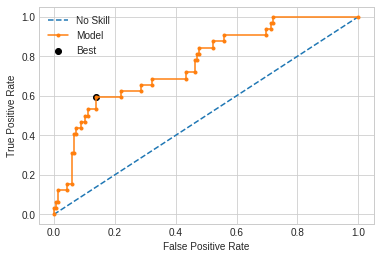

In [27]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [39]:
X_train0, X_dev, y_train0, y_dev = train_test_split(X, y, test_size=0.20, random_state=42)
X_train0.shape

(800, 6)